In [1]:
from tensorboard.backend.event_processing import event_accumulator

In [ ]:
from pathlib import Path
import sys
parent_dir = Path('.').resolve().parent
env = 'noise'
agent = 'log_normal'
lots = 20 
name = f'{parent_dir}/tensorboard_logs/{env}_{lots}_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_{agent}'
event_dir = Path(name)
event_file = max(event_dir.glob('**/events.out.tfevents.*'), key=lambda f: f.stat().st_mtime)
print(event_file)
event_file = str(event_file)
ea = event_accumulator.EventAccumulator(event_file,
                                         size_guidance={
                                             event_accumulator.SCALARS: 0,
                                             event_accumulator.IMAGES: 0,
                                             event_accumulator.AUDIO: 0,
                                             event_accumulator.HISTOGRAMS: 0,
                                         })



/u/weim/lob/tensorboard_logs/noise_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal/events.out.tfevents.1747300964.ada-27.1818986.0


/u/weim/lob/tensorboard_logs/noise_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal/events.out.tfevents.1747300964.ada-27.1818986.0
/u/weim/lob/tensorboard_logs/noise_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_dirichlet/events.out.tfevents.1747339448.ada-27.2194286.0
/u/weim/lob/tensorboard_logs/noise_60_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal/events.out.tfevents.1747306822.ada-27.1861616.0
/u/weim/lob/tensorboard_logs/noise_60_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_dirichlet/events.out.tfevents.1747345264.ada-27.2248880.0


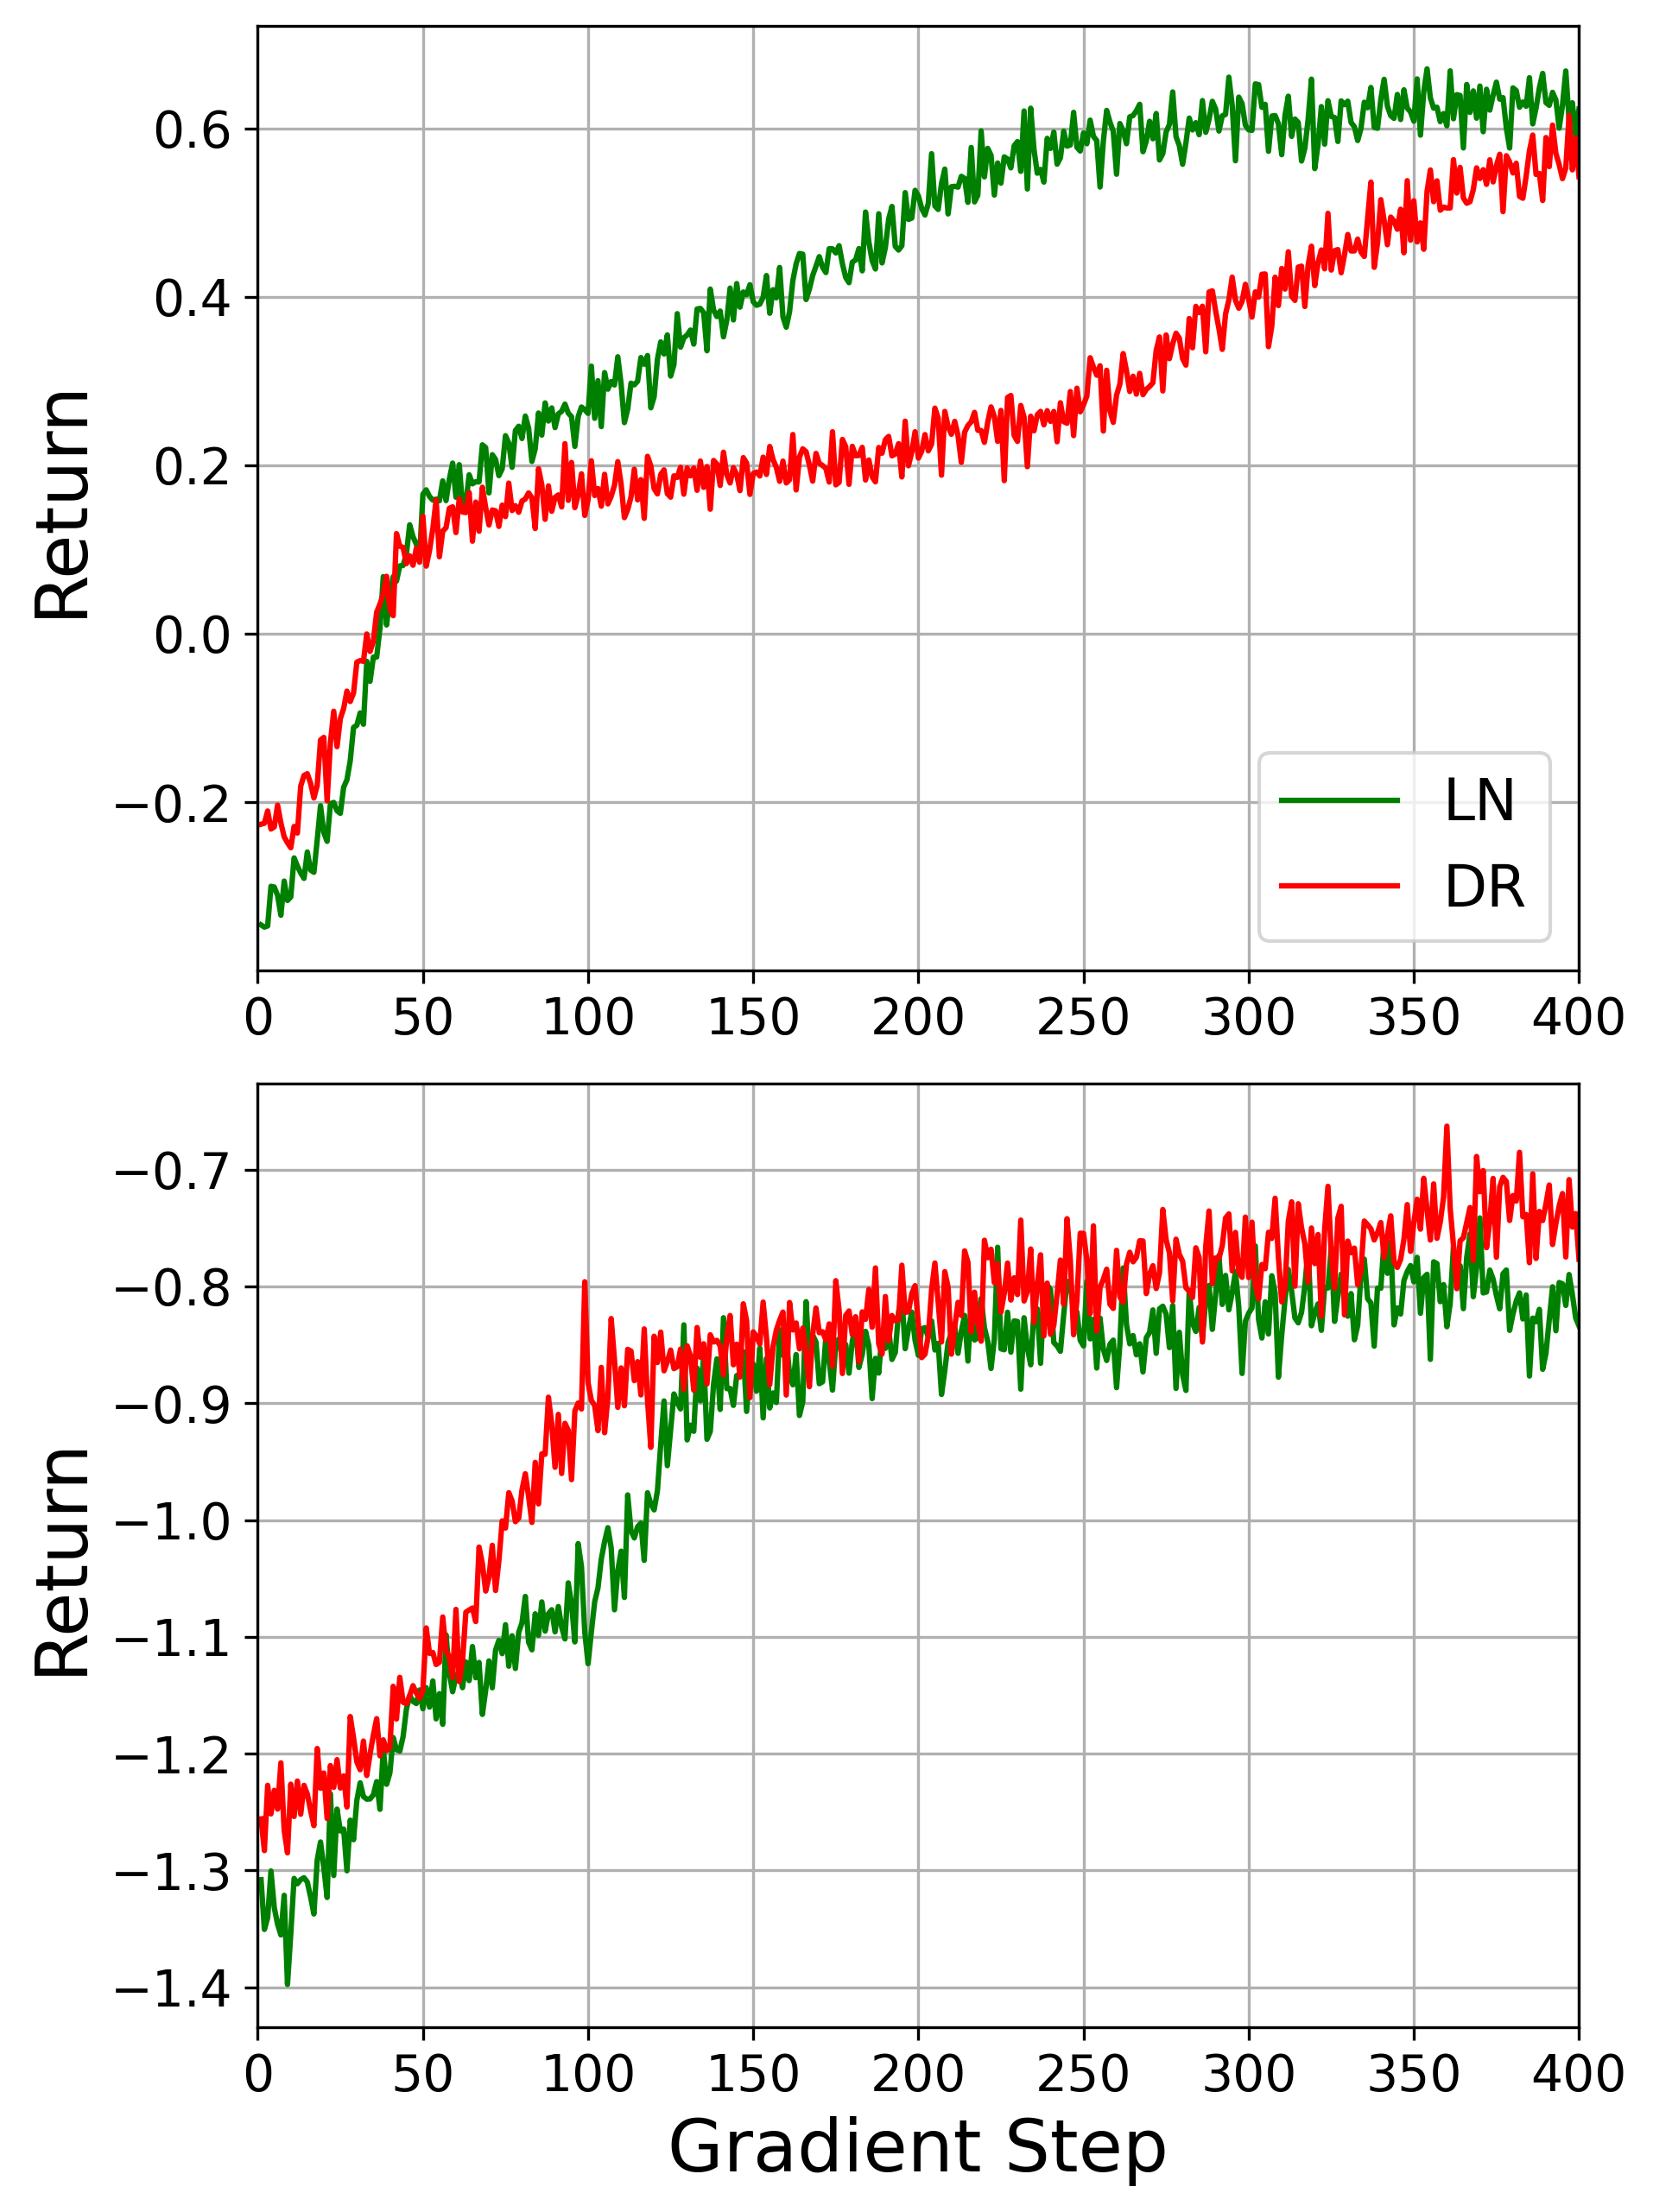

/u/weim/lob/tensorboard_logs/flow_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal/events.out.tfevents.1747313237.ada-27.1908404.0
/u/weim/lob/tensorboard_logs/flow_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_dirichlet/events.out.tfevents.1747351252.ada-27.2292069.0
/u/weim/lob/tensorboard_logs/flow_60_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal/events.out.tfevents.1747319657.ada-27.1957790.0
/u/weim/lob/tensorboard_logs/flow_60_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_dirichlet/events.out.tfevents.1747357567.ada-27.2335992.0


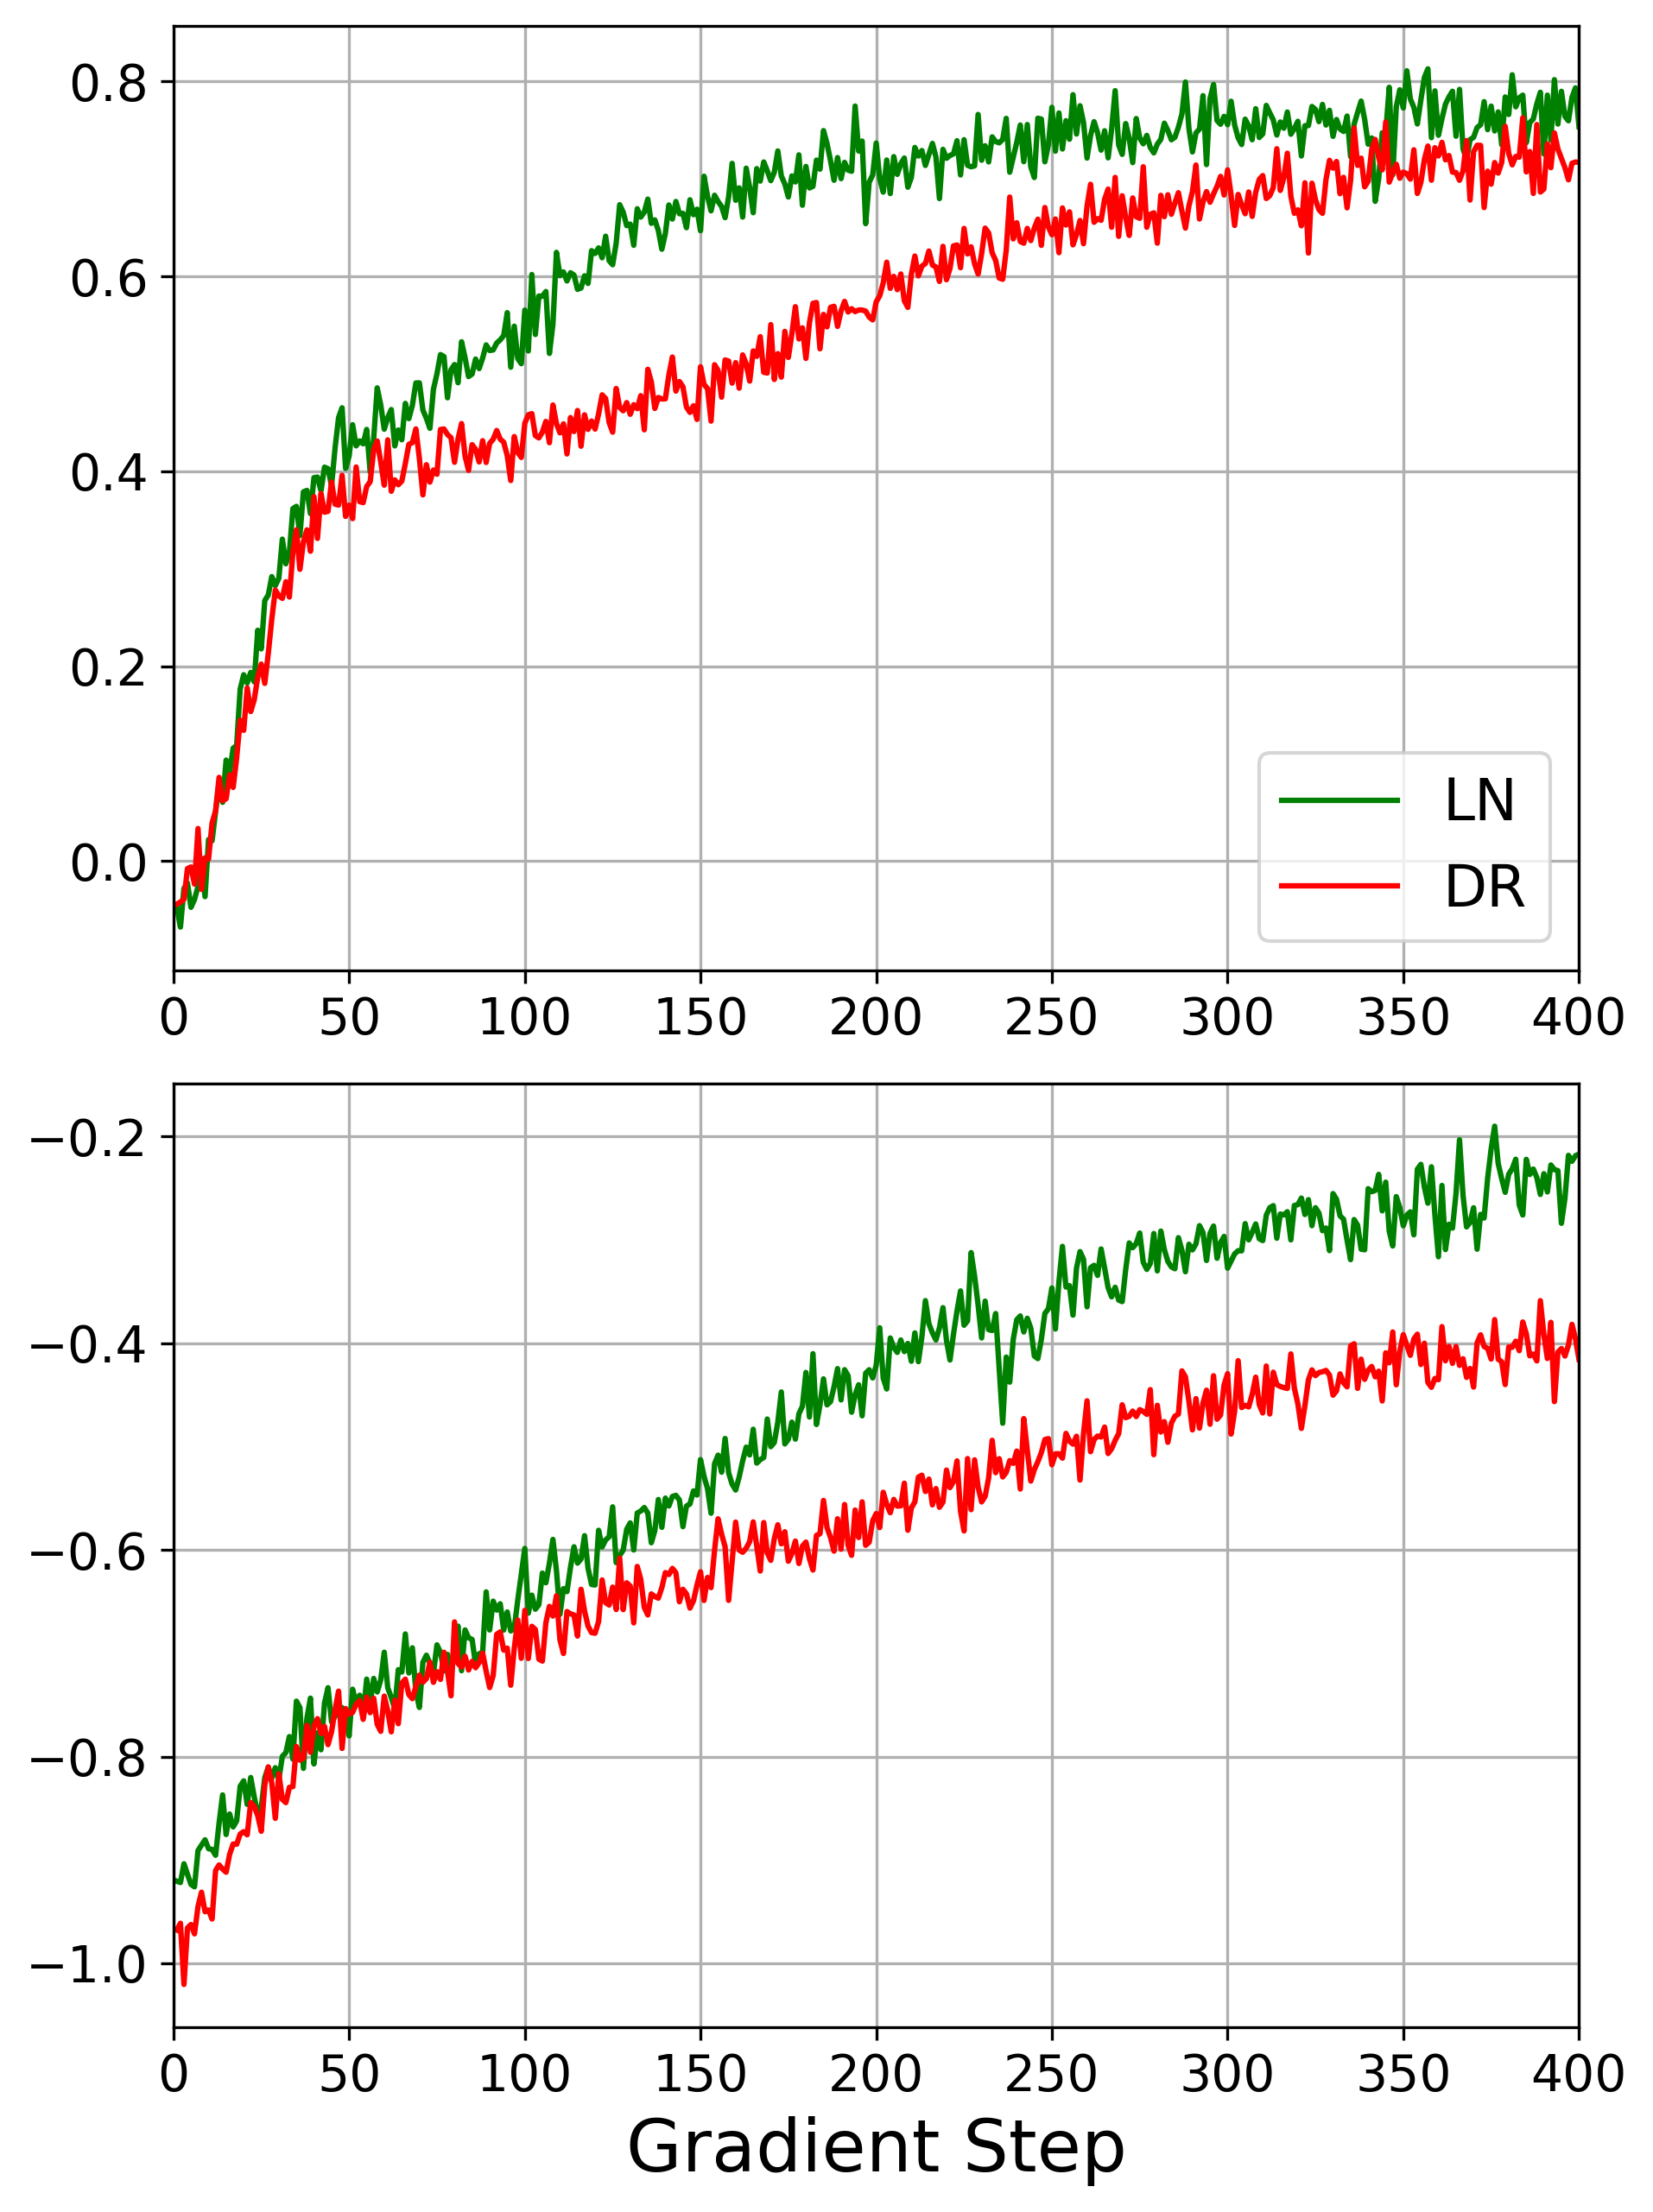

/u/weim/lob/tensorboard_logs/strategic_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal/events.out.tfevents.1747325818.ada-27.2024688.0
/u/weim/lob/tensorboard_logs/strategic_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_dirichlet/events.out.tfevents.1747364090.ada-27.2380623.0
/u/weim/lob/tensorboard_logs/strategic_60_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal/events.out.tfevents.1747332531.ada-27.2129540.0
/u/weim/lob/tensorboard_logs/strategic_60_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_dirichlet/events.out.tfevents.1747371001.ada-27.2429233.0


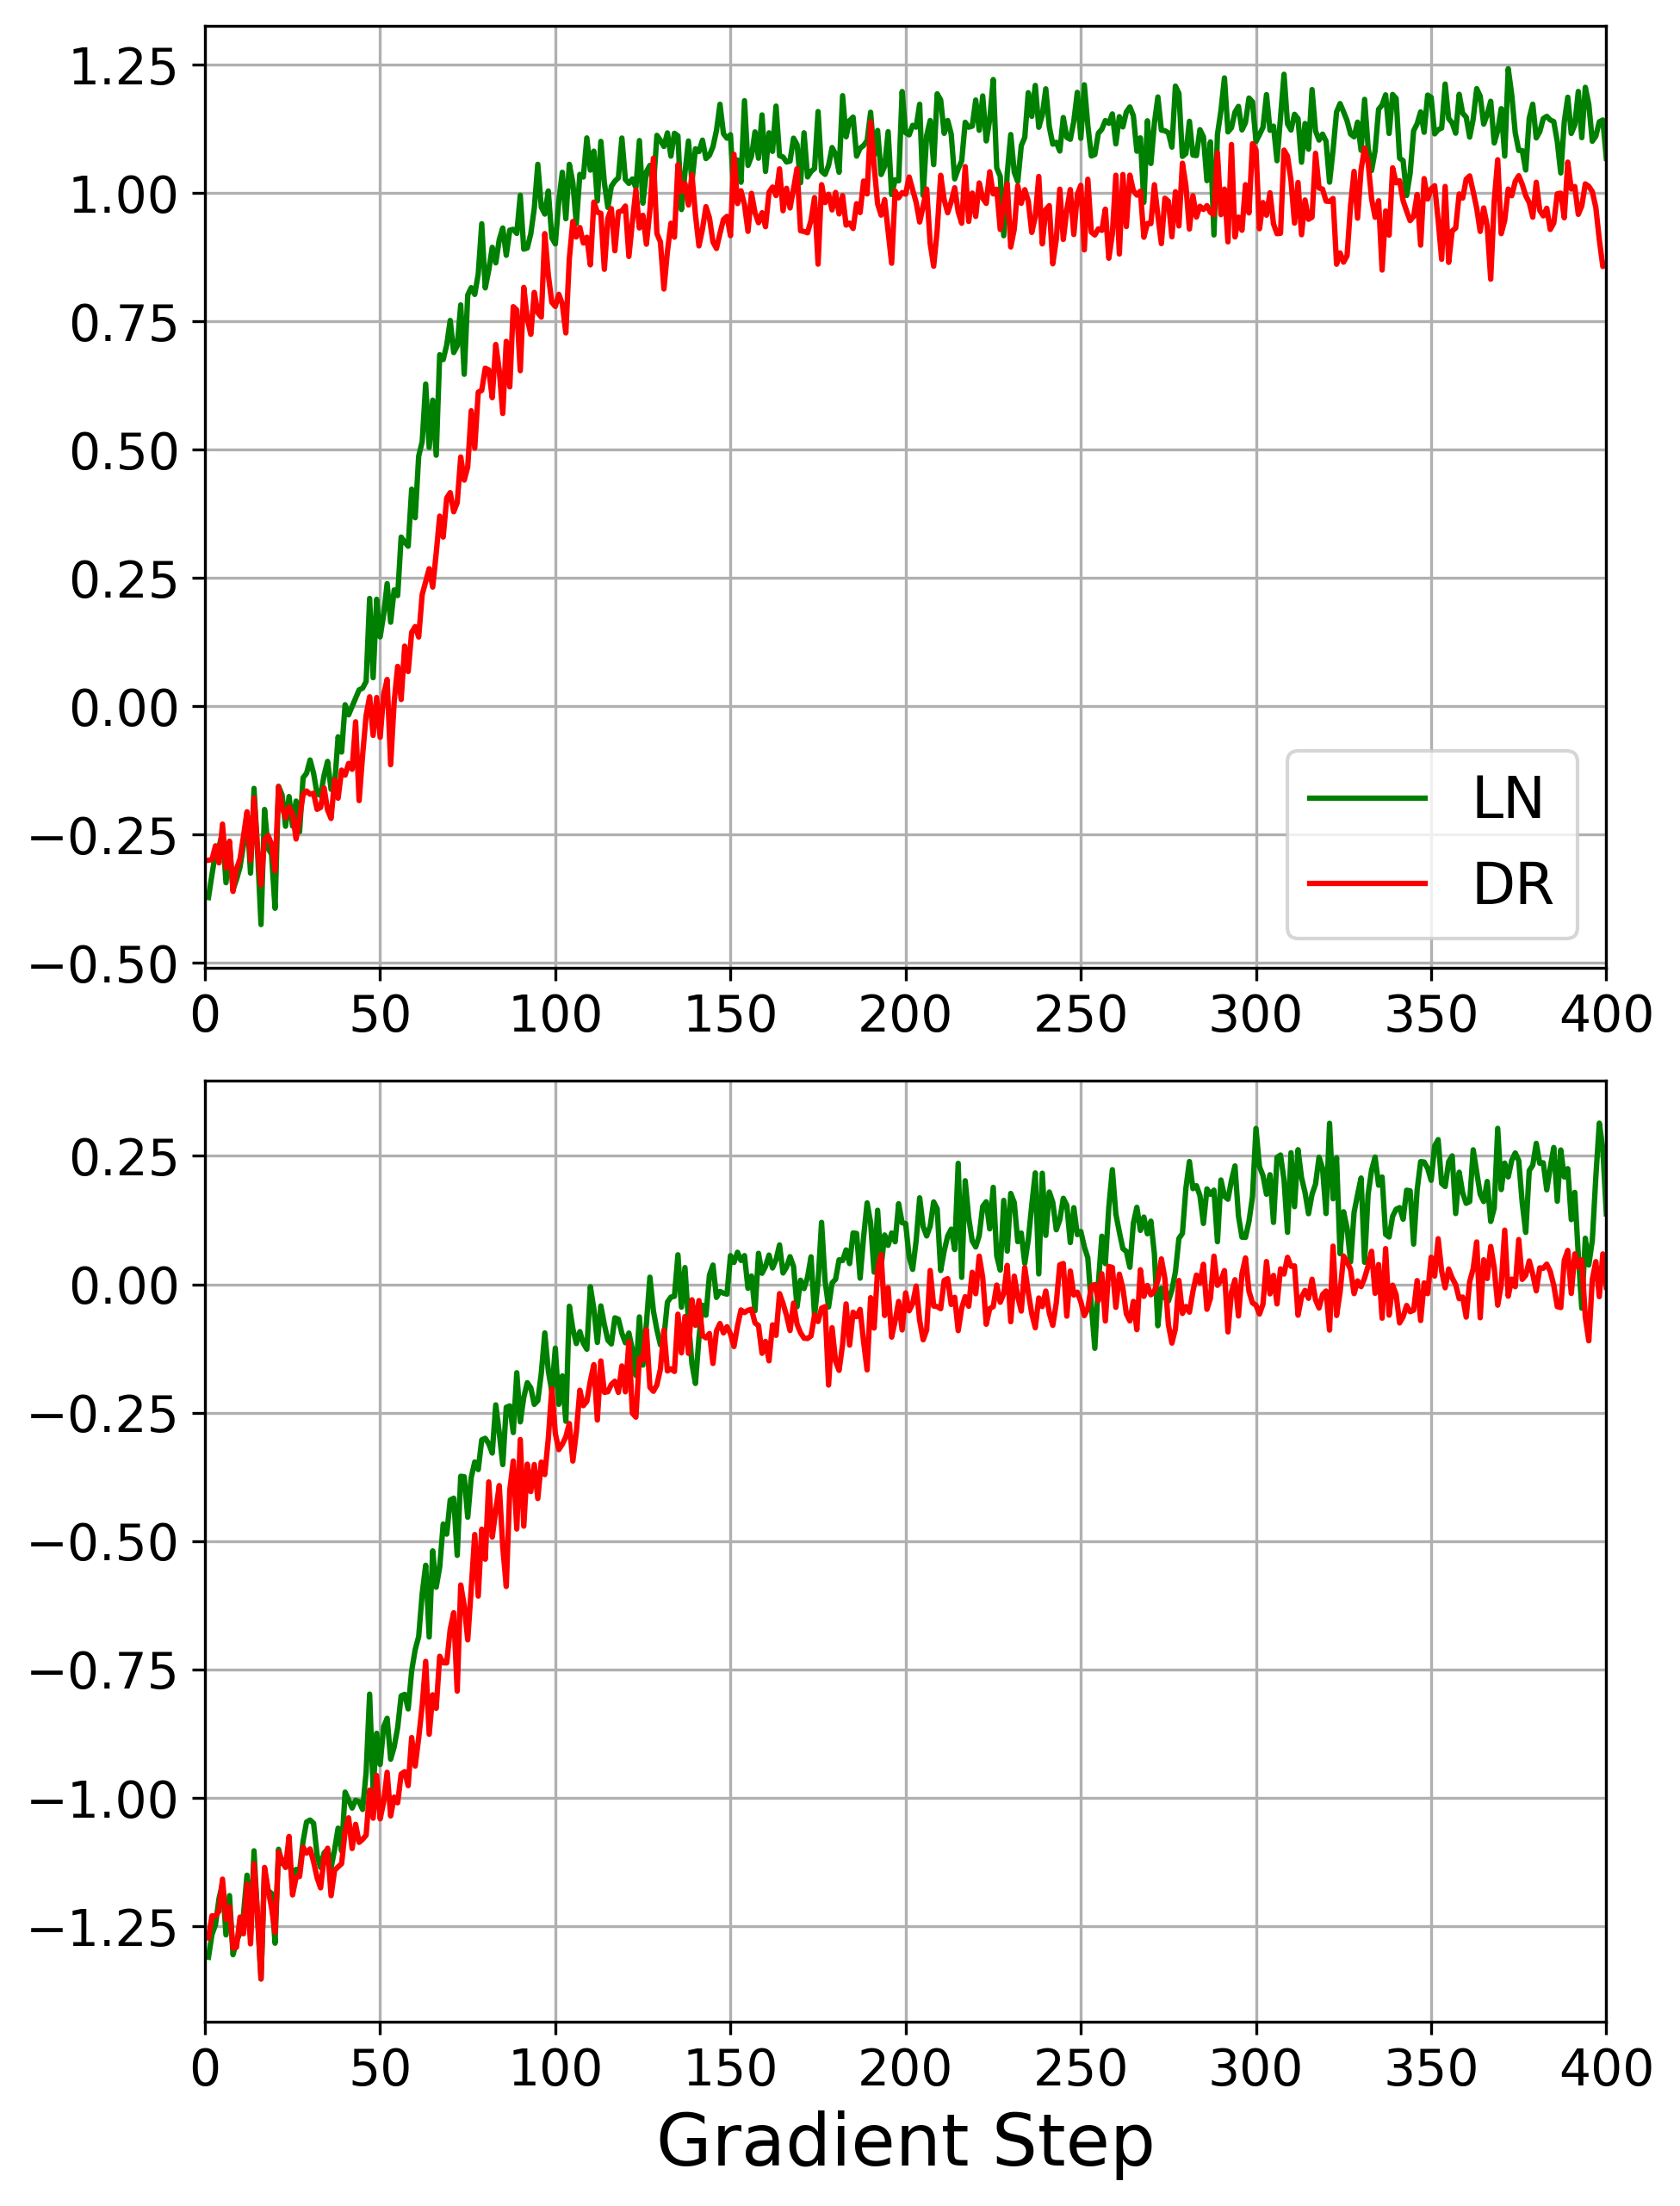

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns
from pathlib import Path
plt.style.use('default') 

lots_list = [20, 60]
textwidth = 6.75
textheight = 9
scale = 3.2

# naming of the tensor: noise, flow, strategic 
parent_dir = Path('.').resolve().parent

for env in ['noise', 'flow', 'strategic']:
    fig, axs = plt.subplots(2, 1, figsize=(scale*0.3*textwidth, scale*0.3*textheight), dpi=300)
    idx = 0
    for lots in [20, 60]:
        for agent in ['log_normal', 'dirichlet']:
            name = f'{parent_dir}/tensorboard_logs/{env}_{lots}_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_{agent}'
            event_dir = Path(name)
            event_file = max(event_dir.glob('**/events.out.tfevents.*'), key=lambda f: f.stat().st_mtime)
            print(event_file)
            event_file = str(event_file)
            ea = event_accumulator.EventAccumulator(event_file,
                                                    size_guidance={
                                                        event_accumulator.SCALARS: 0,
                                                    event_accumulator.IMAGES: 0,
                                                    event_accumulator.AUDIO: 0,
                                                    event_accumulator.HISTOGRAMS: 0,
                                                })

            ea.Reload()  
            df = pd.DataFrame(ea.Scalars('charts/return'))
            translate_names = {'log_normal': 'LN', 'dirichlet': 'DR'}
            if agent == 'log_normal':
                color = 'green'
            if agent == 'dirichlet':
                color = 'red'
            # divide by number of gradient steps and number of environments 
            df['step']= df['step']/ (100 * 128)
            axs[idx].plot(df['step'].values, df['value'].values, label=translate_names[agent], color=color)            
        if env == 'noise':
            axs[idx].set_ylabel('Return', fontsize=20)
        tick_size = 14
        axs[idx].tick_params(axis='x', labelsize=tick_size)
        axs[idx].tick_params(axis='y', labelsize=tick_size)
        axs[idx].set_xlim(left=0)
        axs[idx].set_xlim(right=max(df['step'].values))
        axs[idx].grid(True)
        if idx == 0:
            axs[idx].legend(loc='lower right', prop={'size': 16})
            pass 
            # env_translate = {'noise': 'Nois', 'flow': 'Flow', 'Strategic': 'Strategic'}
            # axs[idx].set_title(f'Return per Step, ')
        if idx == 1:
            axs[idx].set_xlabel('Gradient Step', fontsize=20)
        idx += 1

    fig.tight_layout()
    plt.show()
    fig.savefig(f'{parent_dir}/plots/{env}_return_convergence.pdf', dpi=300)
    plt.close(fig)
